In [1]:
from emlib import emlib

"""
Example 1. Lotka Volterra Predator Prey Interaction
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


"""


def LV_int(t,initial,dtinput,constants):

    x = initial[0]
    y = initial[1]
    A = 1
    B = 1
    C = 1
    D = 1

    x_dot = (A * x) - (B * x *y)
    y_dot = (D * x * y) - (C * y) 

    return [x_dot, y_dot]



LV = emlib.Model(LV_int)



INFO -1105- New Model(1): LV_int
INFO -1117- No algorithm supplied assuming vode/bfd O12 Nsteps3000 dt1
DEBUG -1131- Integrator:vode/bdf order:12 nsteps:3000 dt:1


DEBUG -1138- ODEINT Initials:32
DEBUG -1179- Ending in 2000 runs
DEBUG -1205- Integration dT:0 of 2000 Remaining:2000
DEBUG -1205- Integration dT:500 of 2000 Remaining:1500
DEBUG -1205- Integration dT:1000 of 2000 Remaining:1000
DEBUG -1205- Integration dT:1500 of 2000 Remaining:500
DEBUG -1217- Completed Integration, created np.array shape:(2000, 2)


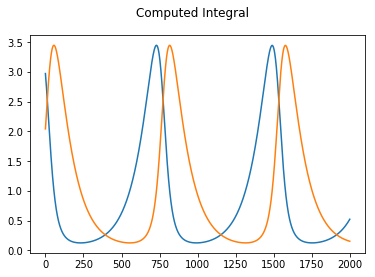

In [2]:
LV.Integrate([3,2],maxdt=20, dt=.01)
LV.Draw()


DEBUG -1138- ODEINT Initials:32
DEBUG -1179- Ending in 2000 runs
DEBUG -1205- Integration dT:0 of 2000 Remaining:2000
DEBUG -1205- Integration dT:500 of 2000 Remaining:1500
DEBUG -1205- Integration dT:1000 of 2000 Remaining:1000
DEBUG -1205- Integration dT:1500 of 2000 Remaining:500
DEBUG -1217- Completed Integration, created np.array shape:(2000, 2)


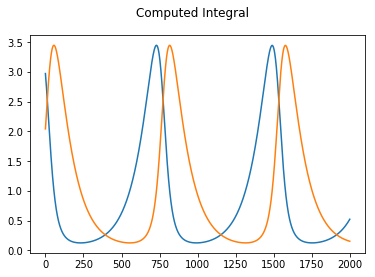

In [3]:
LV.Integrate([3,2],maxdt=20)
LV.Draw()

INFO -1105- New Model(2): Lorenz_int
INFO -1117- No algorithm supplied assuming vode/bfd O12 Nsteps3000 dt1
DEBUG -1131- Integrator:vode/bdf order:12 nsteps:3000 dt:1
INFO -353- New Calibration instance: 1
DEBUG -596- C:1 Sigma 10 True
DEBUG -596- C:2 Rho 99.96 False
DEBUG -596- C:3 Beta 2 True
DEBUG -1138- ODEINT Initials:111
DEBUG -1179- Ending in 3000 runs
DEBUG -1183- Passing Cs:['Sigma', 'Rho', 'Beta']
DEBUG -1205- Integration dT:0 of 3000 Remaining:3000
DEBUG -1205- Integration dT:500 of 3000 Remaining:2500
DEBUG -1205- Integration dT:1000 of 3000 Remaining:2000
DEBUG -1205- Integration dT:1500 of 3000 Remaining:1500
DEBUG -1205- Integration dT:2000 of 3000 Remaining:1000
DEBUG -1205- Integration dT:2500 of 3000 Remaining:500
DEBUG -1217- Completed Integration, created np.array shape:(3000, 3)


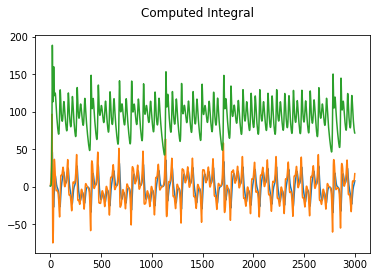

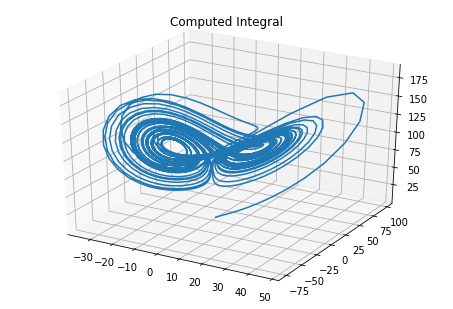

In [4]:

def Lorenz_int(t,initial,dtinput,constants):
        x = initial[0]
        y = initial[1]
        z = initial[2]
    
        sigma = constants.Val("Sigma")
        rho = constants.Val("Rho")
        beta = constants.Val("Beta")
        
        x_dot = sigma * (y - x)
        y_dot = x * (rho - z) - y
        z_dot = (x * y) - (beta* z)
        
        return [x_dot, y_dot, z_dot]

LZ = emlib.Model(Lorenz_int)


LZcalibration = emlib.Calibration()
LZcalibration.Add("Sigma",val=10,isconst=True)
LZcalibration.Add("Rho",val=99.96,min=10,max=100)
LZcalibration.Add("Beta",val=2,isconst=True)
LZcalibration.initial = [1,1,1]

LZ.Integrate(LZcalibration.initial,Calibration=LZcalibration,maxdt=30,dt=.01)

LZ.Draw()
LZ.Draw(graph="3d")


INFO -1105- New Model(3): LV2_int
INFO -1117- No algorithm supplied assuming vode/bfd O12 Nsteps3000 dt1
DEBUG -1131- Integrator:vode/bdf order:12 nsteps:3000 dt:1
INFO -880- New TimeSeries instance: 1
DEBUG -952- New INPUT table examples\LVinput.csv['Date', 'food']
DEBUG -963- Saved 241 rows and 1 columns
DEBUG -965- Converted dates to contiguous np.array
DEBUG -967- Converted input data to contiguous np.array
DEBUG -1138- ODEINT Initials:32
DEBUG -1176- Starting:1900-01-01 Ending:241
DEBUG -1177- Passing DtInput:['food']
DEBUG -1205- Integration dT:0 of 241 Remaining:241
DEBUG -1217- Completed Integration, created np.array shape:(241, 2)


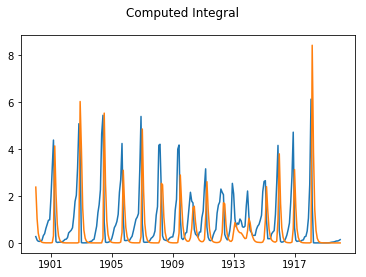

In [5]:
"""
Example 3. Lotka Volterra with dtInput
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


"""


def LV2_int(t,initial,dtinput,constants):
    x = initial[0]
    y = initial[1]
    food = dtinput.Val("food")
    A = 1
    B = 1
    C = 1
    D = 1

    x_dot = (A * food* x) - (B * x *y)
    y_dot = (D * x * y) - (C * y) 

    return [x_dot, y_dot]

LVmodel = emlib.Model(LV2_int)

LVtime = emlib.TimeSeries(filename="examples\LVinput.csv")


LVmodel.Integrate([3,2],TimeSeries=LVtime)

LVmodel.Draw()


DEBUG -740- ['Year', 'Hares', 'Lynx']
DEBUG -742- New OBS for value:Hares COLMS:1 examples\LVdata.csv
INFO -759- Read file examples\LVdata.csv 21 Observations for value Hares
INFO -1105- New Model(4): LV3_int
INFO -1117- No algorithm supplied assuming vode/bfd O12 Nsteps3000 dt1
DEBUG -1131- Integrator:vode/bdf order:12 nsteps:3000 dt:1
INFO -353- New Calibration instance: 2
DEBUG -596- C:4 A 0.5 False
DEBUG -596- C:5 B 0.02 False
DEBUG -596- C:6 C 0.9 False
DEBUG -596- C:7 D 0.03 False
INFO -880- New TimeSeries instance: 2
DEBUG -952- New INPUT table examplesLVinput.csv['Date', 'food']
DEBUG -963- Saved 241 rows and 1 columns
DEBUG -965- Converted dates to contiguous np.array
DEBUG -967- Converted input data to contiguous np.array
DEBUG -1138- ODEINT Initials:30.04.0
DEBUG -1176- Starting:1900-01-01 Ending:241
DEBUG -1177- Passing DtInput:['food']
DEBUG -1183- Passing Cs:['A', 'B', 'C', 'D']
DEBUG -1205- Integration dT:0 of 241 Remaining:241
DEBUG -1217- Completed Integration, created

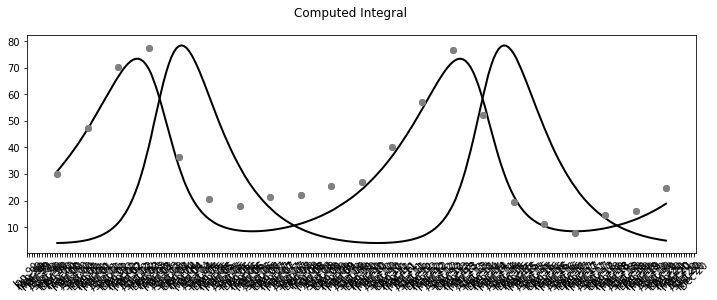

In [6]:
"""
Example 4. Lotka Volterra Validation
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


"""


def LV3_int(t,initial,dtinput,constants):
    x = initial[0]
    y = initial[1]
    A = constants.Val("A")
    B = constants.Val("B")
    C = constants.Val("C")
    D = constants.Val("D")

    x_dot = (A * x) - (B * x *y)
    y_dot = (D * x * y) - (C * y) 

    return [x_dot, y_dot]


hares = emlib.Observation("Hares",filename="examples\LVdata.csv")


LVmodel = emlib.Model(LV3_int)

LVBEST = emlib.Calibration()
LVBEST.Add("A",val=.5)
LVBEST.Add("B",val=.02)
LVBEST.Add("C",val=.9)
LVBEST.Add("D",val=.03)
LVBEST.initial = [30.0,4.0]

LVtime = emlib.TimeSeries(dirname="examples", filename="LVinput.csv")
LVmodel.Integrate(LVBEST.initial,Calibration=LVBEST,TimeSeries=LVtime,dt=(1.0/12.0))
LVmodel.Validate(hares,graph=True)



INFO -759- Read file examples/LVdata.csv 21 Observations for value Hares
INFO -1105- New Model(6): LV3_int
INFO -1117- No algorithm supplied assuming vode/bfd O12 Nsteps3000 dt1
INFO -353- New Calibration instance: 4
INFO -880- New TimeSeries instance: 4


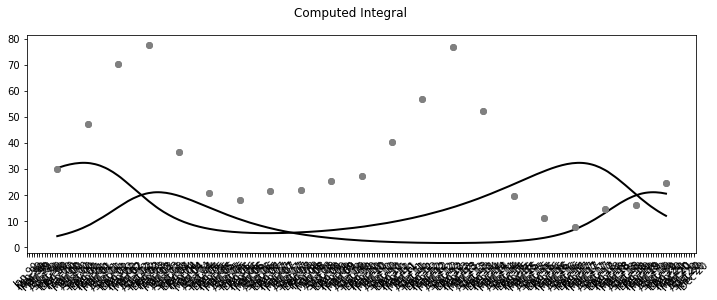

WARNING -1352- No fitness method provided, assuming GF_BruteForceMSE


GFMODEL #0 Xtot:6.323 RMSD:100.0 RMSE:0 RANGE%0 MSER:0.0 WMSE:0.0
Label	Value	Min	Max	ISConst	Desc
A 	 0.3 	 0.01 	 0.7 	 False 	 None
B 	 0.04 	 0.01 	 0.07 	 False 	 None
C 	 0.6 	 0.5 	 1.0 	 False 	 None
D 	 0.04 	 0.01 	 0.05 	 False 	 None


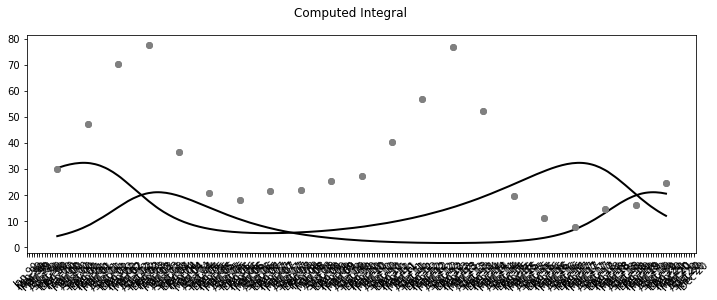

GFMODEL #0 Xtot:6.323 RMSD:100.0 RMSE:0 RANGE%0 MSER:0.0 WMSE:0.0


In [9]:
import logging
"""
Example 5. Lotka Volterra Calibration
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


"""
emlib.emlog.setLevel(logging.INFO)

def LV3_int(t,initial,dtinput,constants):
    x = initial[0]
    y = initial[1]
    A = constants.Val("A")
    B = constants.Val("B")
    C = constants.Val("C")
    D = constants.Val("D")

    x_dot = (A * x) - (B * x *y)
    y_dot = (D * x * y) - (C * y) 

    return [x_dot, y_dot]



hares = emlib.Observation("Hares",filename="examples/LVdata.csv")


LVmodel = emlib.Model(LV3_int)

LVtest = emlib.Calibration()
LVtest.Add("A",val=.3,min=.01,max=.7)
LVtest.Add("B",val=.04,min=.01,max=.07)
LVtest.Add("C",val=.6,min=.5,max=1.0)
LVtest.Add("D",val=.04,min=.01,max=.05)
LVtest.initial = [30.0,4.0]

LVtime = emlib.TimeSeries(filename="examples/LVinput.csv")
LVmodel.Integrate(LVtest.initial,Calibration=LVtest,TimeSeries=LVtime,dt=(1.0/12.0))
LVmodel.Validate(hares,graph=True)
LVmodel.fit.Print()

best = LVmodel.Calibrate(LVtest,hares,runs=500,TimeSeries=LVtime,dt=(1.0/12.0))

best.Print()
LVmodel.Integrate(LVtest.initial,Calibration=best,TimeSeries=LVtime,dt=(1.0/12.0))
LVmodel.Validate(hares,graph=True)
LVmodel.fit.Print()
